<a href="https://colab.research.google.com/github/magladko/NAI/blob/master/mpp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAI – mpp1 by Kornel Gładkowski
*@s22411*

In [467]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Load training dataset.

In [468]:
train_df = pd.read_csv('drive/MyDrive/4. semestr/NAI/mpp1/iristrain.csv')
train_df.head()

,nr,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,6,5.4,3.9,1.7,0.4,setosa
4,7,4.6,3.4,1.4,0.3,setosa


Load test dataset.

In [469]:
test_df = pd.read_csv('drive/MyDrive/4. semestr/NAI/mpp1/iristest.csv')
test_df.head()

,nr,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4,4.6,3.1,1.5,0.2,setosa
1,5,5.0,3.6,1.4,0.2,setosa
2,10,4.9,3.1,1.5,0.1,setosa
3,11,5.4,3.7,1.5,0.2,setosa
4,16,5.7,4.4,1.5,0.4,setosa


Text(0.5, 1.08, 'Pair Plot of training dataset')

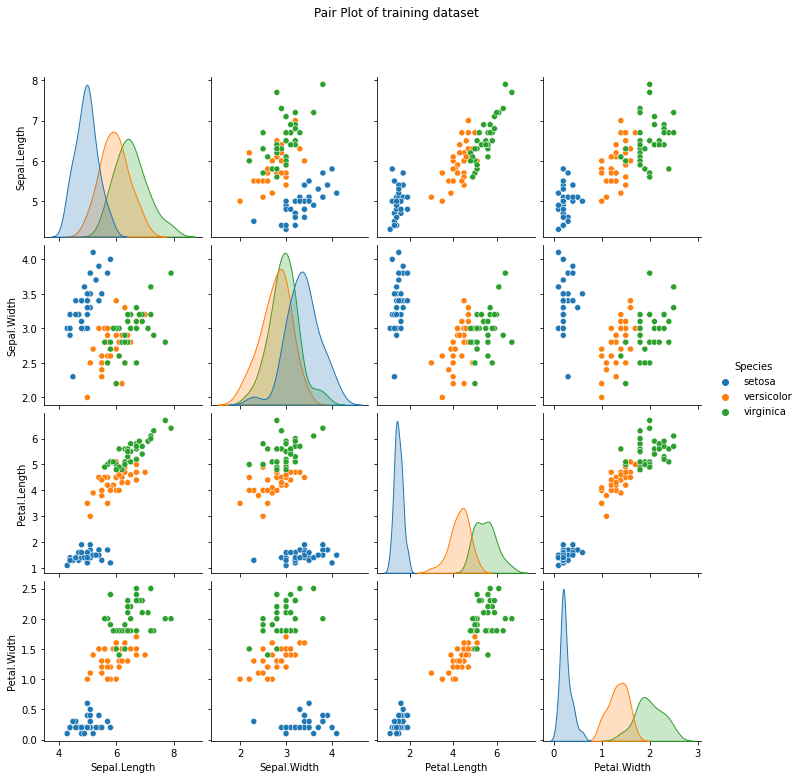

In [470]:
train_plots = sns.pairplot(data=train_df.drop('nr', axis=1), hue='Species')
train_plots.fig.suptitle('Pair Plot of training dataset', y=1.08)

In [471]:
dist_df = pd.DataFrame({'test_nr': [], 'train_nr': [], 'dist':[], 'train_value': []})

for test_index, test_row in test_df.iterrows():
  for train_index, train_row in train_df.iterrows():
    sum = 0

    # ignore 'nr' column and 'Species' column
    for i in range(1, len(train_df.columns)-1):
      sum += (train_row[i]-test_row[i])**2
      
    dist_df = dist_df.append({'test_nr': test_row['nr'], 
                              'train_nr': train_row['nr'], 
                              'dist': np.sqrt(sum),
                              'train_value': train_row['Species']}, 
                             ignore_index=True)

dist_df.sort_values(['test_nr', 'dist'], inplace=True)
dist_df.head()

,test_nr,train_nr,dist,train_value
31,4.0,48.0,0.141421,setosa
19,4.0,30.0,0.173205,setosa
20,4.0,31.0,0.223607,setosa
2,4.0,3.0,0.244949,setosa
8,4.0,13.0,0.264575,setosa


In [472]:
dist_df.describe()

,test_nr,train_nr,dist
count,5000.000000,5000.000000,5000.000000
mean,76.500000,75.000000,2.562249
std,43.273832,43.311375,1.645334
min,4.000000,1.000000,0.000000
25%,40.000000,37.750000,1.067708
50%,76.500000,74.500000,2.369599
75%,113.000000,111.750000,3.880722
max,149.000000,150.000000,7.085196


In [473]:
#@title k parameter { run: "auto", vertical-output: true }
k = 4 #@param {type:"slider", min:1, max:100, step:1}


In [474]:
# result_list = dist_df['train_value'].unique()
k_smallest = pd.DataFrame()

for test_index, test_row in test_df.iterrows():
  # print(dist_df.loc[dist_df['test_nr'] == test_row['nr']])
  k_smallest = k_smallest.append(dist_df.loc[dist_df['test_nr'] == test_row['nr']].nsmallest(k, 'dist'))
  # results = dict.fromkeys(result_list)
  # print(k_smallest)
k_smallest.head()

,test_nr,train_nr,dist,train_value
31,4.0,48.0,0.141421,setosa
19,4.0,30.0,0.173205,setosa
20,4.0,31.0,0.223607,setosa
2,4.0,3.0,0.244949,setosa
125,5.0,38.0,0.141421,setosa


In [475]:
k_smallest = k_smallest.groupby(['test_nr', 'train_value']).count()
k_smallest.reset_index(inplace=True)
k_smallest.head()

,test_nr,train_value,train_nr,dist
0,4.0,setosa,4,4
1,5.0,setosa,4,4
2,10.0,setosa,4,4
3,11.0,setosa,4,4
4,16.0,setosa,4,4


In [476]:
k_smallest.sort_values(['test_nr', 'train_nr'], ascending=[True,False], inplace=True, ignore_index=True)
# k_smallest.sort_values(['train_nr', 'test_nr'], ascending=[False,True], inplace=True, ignore_index=True)
k_smallest.head()

,test_nr,train_value,train_nr,dist
0,4.0,setosa,4,4
1,5.0,setosa,4,4
2,10.0,setosa,4,4
3,11.0,setosa,4,4
4,16.0,setosa,4,4


In [477]:
k_smallest.drop_duplicates('test_nr', keep='first', inplace=True, ignore_index=True)
k_smallest.head()

,test_nr,train_value,train_nr,dist
0,4.0,setosa,4,4
1,5.0,setosa,4,4
2,10.0,setosa,4,4
3,11.0,setosa,4,4
4,16.0,setosa,4,4


In [478]:
guess_df = test_df

guess_df['guess'] = k_smallest['train_value']
guess_df.head()

,nr,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,guess
0,4,4.6,3.1,1.5,0.2,setosa,setosa
1,5,5.0,3.6,1.4,0.2,setosa,setosa
2,10,4.9,3.1,1.5,0.1,setosa,setosa
3,11,5.4,3.7,1.5,0.2,setosa,setosa
4,16,5.7,4.4,1.5,0.4,setosa,setosa


Text(0.5, 1.08, 'Pair Plot of resulting dataset')

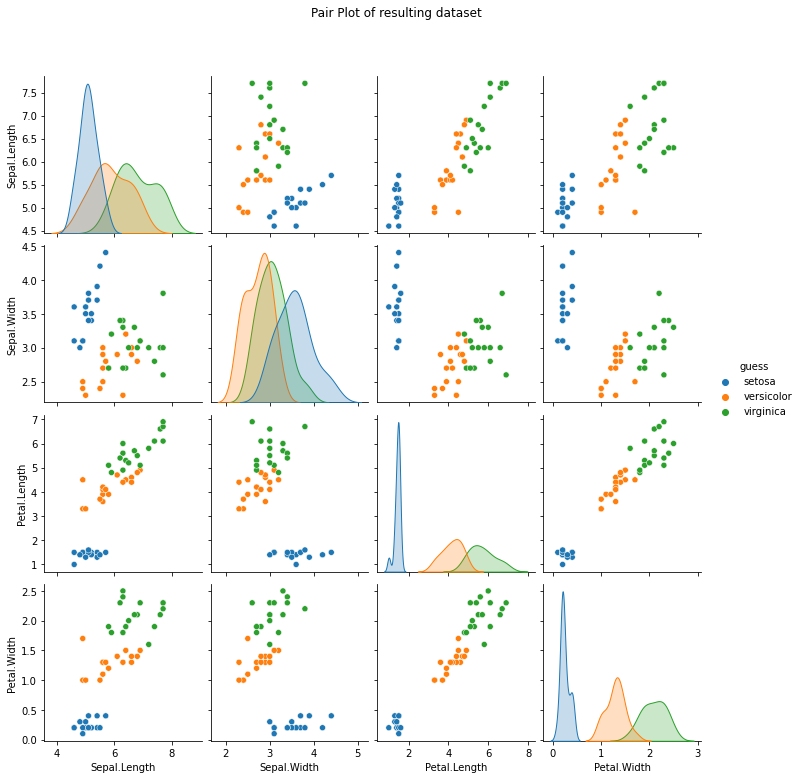

In [479]:
train_plots = sns.pairplot(data=guess_df.drop('nr', axis=1).drop('Species', axis=1), hue='guess')
train_plots.fig.suptitle('Pair Plot of resulting dataset', y=1.08)

In [480]:
errors = 0
for i, r in guess_df.iterrows():
  if r['Species'] != r['guess']:
    errors += 1

mistake_rate = errors / len(guess_df.index)
print(mistake_rate, errors)

0.04 2
